**Import Python modules**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import os

print(cv2.__version__, cv2.__spec__)
#print(cv2.getBuildInformation())

4.1.2 ModuleSpec(name='cv2.cv2', loader=<_frozen_importlib_external.ExtensionFileLoader object at 0x7f0716ce42b0>, origin='/usr/local/lib/python3.6/dist-packages/cv2/cv2.cpython-36m-x86_64-linux-gnu.so')


**Mount Google Drive: First mount and authenticate yourself with the following code**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
#Second change your current folder to point working folder My Drive
os.chdir("/content/drive/My Drive/")
#os.listdir()

**Image Filtering in the Frequency Domain**

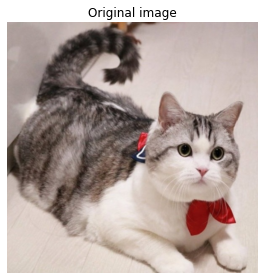

In [4]:
I  = cv2 .imread('./images/cat.png')
I  = cv2 .cvtColor(I, cv2.COLOR_BGR2RGB) 
fig = plt .figure() 
plt.imshow(I), plt.title('Original image'), plt.axis('off') 
plt.tight_layout() 
plt.show()

In [5]:
def im2double(im):
  min_val = np.min(im.ravel())
  max_val = np.max(im.ravel())
  out = (im.astype('float') - min_val) / (max_val - min_val)
  return out

**Fourier transform using OpenCV**

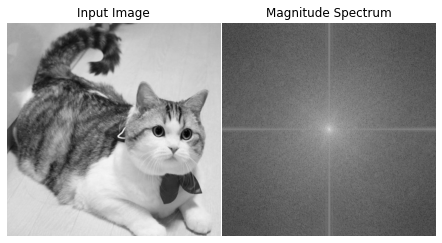

In [6]:
I = cv2.imread('./images/cat.png',0)
f = cv2.dft(np.float32(I),flags = cv2.DFT_COMPLEX_OUTPUT)
fshift = np.fft.fftshift(f)

magnitude_spectrum = 20*np.log(cv2.magnitude(fshift[:,:,0],fshift[:,:,1]))
plt.figure('Fourier transform using OpenCV')
plt.subplot(121), plt.imshow(I, cmap = 'gray')
plt.title('Input Image'), plt.axis('off')
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.axis('off')
plt.tight_layout(pad=.2)
plt.show()

**Fourier transform using numpy**

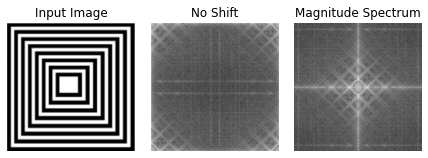

In [7]:
I = cv2.imread('./images/pattern.png',0)
#Compute the 2-D Fourier transform
f = np.fft.fft2(I)
#Shift the zero-frequency component to the center of the output
fshift = np.fft.fftshift(f)
#To enhance details of regions with small amplitudes, plot the logarithm
magnitude_spectrum = 20*np.log(np.abs(fshift))
magnitude_spectrumNS = 20*np.log(np.abs(f))

plt.figure('Fourier transform using numpy')
plt.subplot(131), plt.imshow(I, cmap = 'gray')
plt.title('Input Image'), plt.axis('off')
plt.subplot(132), plt.imshow(magnitude_spectrumNS, cmap = 'gray')
plt.title('No Shift'), plt.axis('off')
plt.subplot(133), plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.axis('off')
plt.tight_layout(pad=.2)
plt.show()

**Distance matrix**

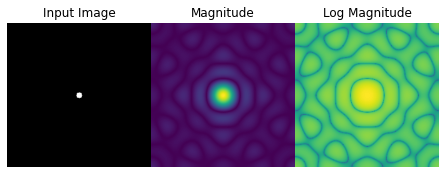

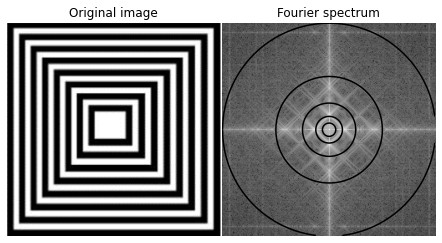

In [8]:
r, c = I.shape
#Create initial filter with all values of zero
H = np.zeros((r,c), np.float32)
x = np.arange(r)-r/2
y = c/2-np.arange(c)
X, Y = np.meshgrid(x,y)
radius = 5
D = np.sqrt(X**2 + Y**2) #Distance matrix
ind = (D <= radius)
H[ind]=1
#Compute the 2D Fourier transform
HF = np.fft.fft2(H)
#Shift the zero-frequency component to the center of the output
HFshift = np.fft.fftshift(HF)
#To enhance details of regions with small amplitudes, plot the logarithm
MS = 20*np.log(np.abs(HFshift))

# fig = plt.figure('Surface')
# ax = plt.axes(projection='3d')
# ax.plot_surface(X,Y,H,linewidth=0,antialiased=False,edgecolor='none')

plt.figure('Ideal LPF')
plt.subplot(131), plt.imshow(H, cmap = 'gray')
plt.title('Input Image'), plt.axis('off')
plt.subplot(132), plt.imshow(np.abs(HFshift))
plt.title('Magnitude'), plt.axis('off')
plt.subplot(133), plt.imshow(MS)
plt.title('Log Magnitude'), plt.axis('off')
plt.tight_layout(pad=.01)
plt.show()

#Apply the filter to the FT image
DFT_filt = H*f
I2 = np.real(np.fft.ifft2(np.fft.ifftshift(DFT_filt)))
plt.figure('Ideal LPF contours')
plt.subplot(121), plt.imshow(I, cmap = 'gray')
plt.title('Original image'), plt.axis('off')
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap = 'gray'),
plt.contour(D,[8,16,32,64,128],colors='black')
plt.title('Fourier spectrum'), plt.axis('off')
plt.tight_layout(pad=.2)
plt.show()

**Low-pass Gaussian LPF**

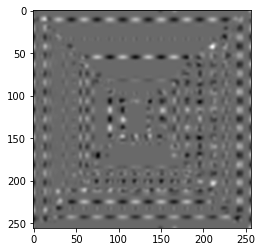

In [9]:
sigma = 20
H_gau = np.exp(-(D**2)/(2*(sigma**2)))
DFT_filt_gau = H_gau*f

I3 = np.real(np.fft.ifft2(np.fft.ifftshift(DFT_filt_gau)))
plt.imshow(20*np.log(np.abs(np.fft.fftshift(DFT_filt_gau))))
plt.imshow(I3, cmap = 'gray')

**Butterworth LPF**

(<matplotlib.image.AxesImage at 0x7f070197b898>,
 Text(0.5, 1.0, 'Butterworth low-pass'))

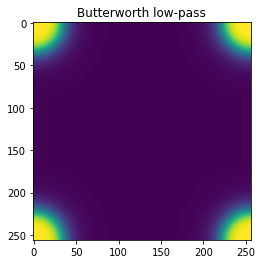

In [10]:
D0 = 35; n = 3
H_but = 1/(1 + (D/D0)**(2*n))
DFT_filt_but = H_but*f;

I4 = np.real(np.fft.ifft2(np.fft.ifftshift(DFT_filt_but)))
plt.imshow(np.fft.fftshift(H_but)), plt.title('Butterworth low-pass')